# Implementation Traditional Convolutional Autoencoder on MNIST dataset


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

from tqdm import tqdm

In [2]:
transform = transforms.ToTensor()

mnist_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

data_loader = torch.utils.data.DataLoader(dataset=mnist_data, batch_size=64, shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:03<00:00, 2624734.88it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 488856.44it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4352664.10it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 10496159.10it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [3]:
dataiter = iter(data_loader)
images, labels = next(dataiter)
print(torch.min(images), torch.max(images))

tensor(0.) tensor(1.)


In [6]:
class ConvAutoencoder(nn.Module):
  def __init__(self):
    super().__init__()
    self.encoder = nn.Sequential(
        nn.Conv2d(1, 16, 3, stride=2, padding=1),
        nn.ReLU(),
        nn.Conv2d(16, 32, 3, stride=2, padding=1),
        nn.ReLU(),
        nn.Conv2d(32, 64, 7)
    )

    self.decoder = nn.Sequential(
        nn.ConvTranspose2d(64, 32, 7),
        nn.ReLU(),
        nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),
        nn.ReLU(),
        nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1),
        nn.Sigmoid()
    )

  def forward(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [7]:
model = ConvAutoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [8]:
num_epochs = 10
outputs = []
for epoch in tqdm(range(num_epochs)):
  for (img, _) in data_loader:
    recon = model(img)
    loss = criterion(recon, img)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print(f'Epoch:{epoch+1}, Loss:{loss.item():.4f}')
  outputs.append((epoch, img, recon))

 10%|█         | 1/10 [00:36<05:28, 36.49s/it]

Epoch:1, Loss:0.0111


 20%|██        | 2/10 [01:14<04:59, 37.41s/it]

Epoch:2, Loss:0.0060


 30%|███       | 3/10 [01:52<04:22, 37.45s/it]

Epoch:3, Loss:0.0051


 40%|████      | 4/10 [02:29<03:44, 37.37s/it]

Epoch:4, Loss:0.0032


 50%|█████     | 5/10 [03:04<03:02, 36.47s/it]

Epoch:5, Loss:0.0032


 60%|██████    | 6/10 [03:41<02:27, 36.77s/it]

Epoch:6, Loss:0.0033


 70%|███████   | 7/10 [04:18<01:50, 36.82s/it]

Epoch:7, Loss:0.0032


 80%|████████  | 8/10 [04:55<01:14, 37.04s/it]

Epoch:8, Loss:0.0029


 90%|█████████ | 9/10 [05:34<00:37, 37.44s/it]

Epoch:9, Loss:0.0026


100%|██████████| 10/10 [06:12<00:00, 37.24s/it]

Epoch:10, Loss:0.0024


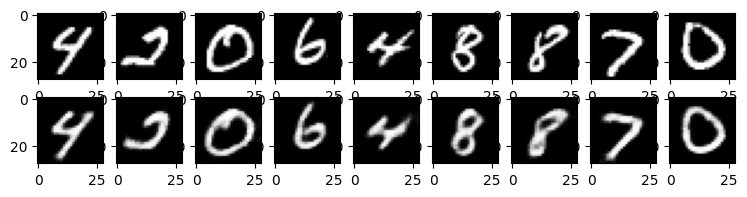

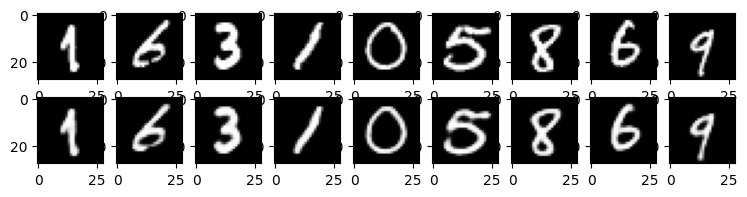

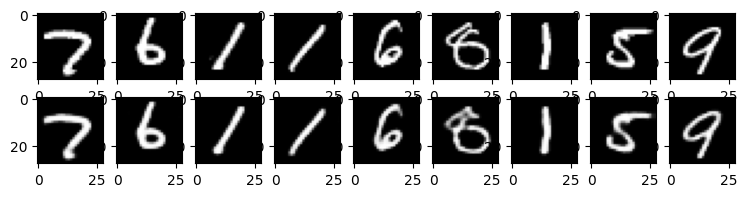

In [9]:
for k in range(0, num_epochs, 4):
  plt.figure(figsize=(9,2))
  plt.gray()
  imgs = outputs[k][1].detach().numpy()
  recon = outputs[k][2].detach().numpy()
  for i, item in enumerate(imgs):
    if i >= 9:
      break
    plt.subplot(2, 9, i+1)
    plt.imshow(item[0])

  for i, item in enumerate(recon):
    if i >= 9:
      break
    plt.subplot(2, 9, 9+i+1)
    plt.imshow(item[0])